# Package Overview

This is an overview of the Reviewer package created to scrape, preprocess, and analyze IMDB movie reviews. 

## <a name="table">Table of Contents</a> 

1. [Functions](#functions)
2. [Single Movie](#single)  
    2.1 [Scrape](#single-scrape)  
    2.2 [Counts](#single-counts)  
    2.3 [Cloud](#single-cloud)  
    
3. [Multiple Movies](#multiple)

    3.1 [Scrape](#multiple-scrape)  
    3.2 [C-TF-IDF](#multiple-ctfidf)  
    3.3 [Cloud](#multiple-cloud)  
    
4. [Disney + Pixar Movies](#disney)

    4.1 [Scrape](#disney-scrape)  
    4.2 [C-TF-IDF](#disney-ctfidf)  
    4.3 [Cloud](#disney-cloud)  

## <a name="functions">1. Functions</a> 
[Back to Table of Contents](#table)

In [1]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from Reviewer.scraper import Scraper
from Reviewer.tfidf import TFIDF
from Reviewer.cloud import WordCloudGenerator

## <a name="single">2. Single Movie</a> 
[Back to Table of Contents](#table)

The following is a set of functions used to analyze a single movie. Here, the package makes
use of only counts without calculating any TF-IDF values or Keyword extraction. 
In practice, I would advise you to scrape multiple movies and as the comparison of words in 
C-TF-IDF (explained later) will give very interesting results. 

In [ ]:
prefix = "avengers"

#### <a name="single-scrape">2.1 Scrape</a>   
Scrape reviews from the review page of an IMDB movie and save them to a json file with a custom prefix in the name. 

In [2]:
sc = Scraper(dir_path="../", prefix=prefix)
urls = ["https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ov_rt"]  # More movies is preferred for c-TF-IDF
sc.scrape(urls)
sc.parse_data()

#### <a name="single-counts">2.2 Counts</a> 
Generate count information based on the review data. Thus, extract most common words. 

In [2]:
tf = TFIDF(dir_path="../")
tf.generate(review_path=f"../data/{prefix}_reviews.json", save_prefix=prefix)

#### <a name="single-cloud">2.3 Cloud</a> 
Generate a word cloud based on the above count data. Make sure to create a .jpg mask in image/masks/ and put the correct link in the parameter "mask". Moreover, make sure to create a solid white background. Only pure white (i.e., 255) is ignored when used as the background (see examples in image/masks/).

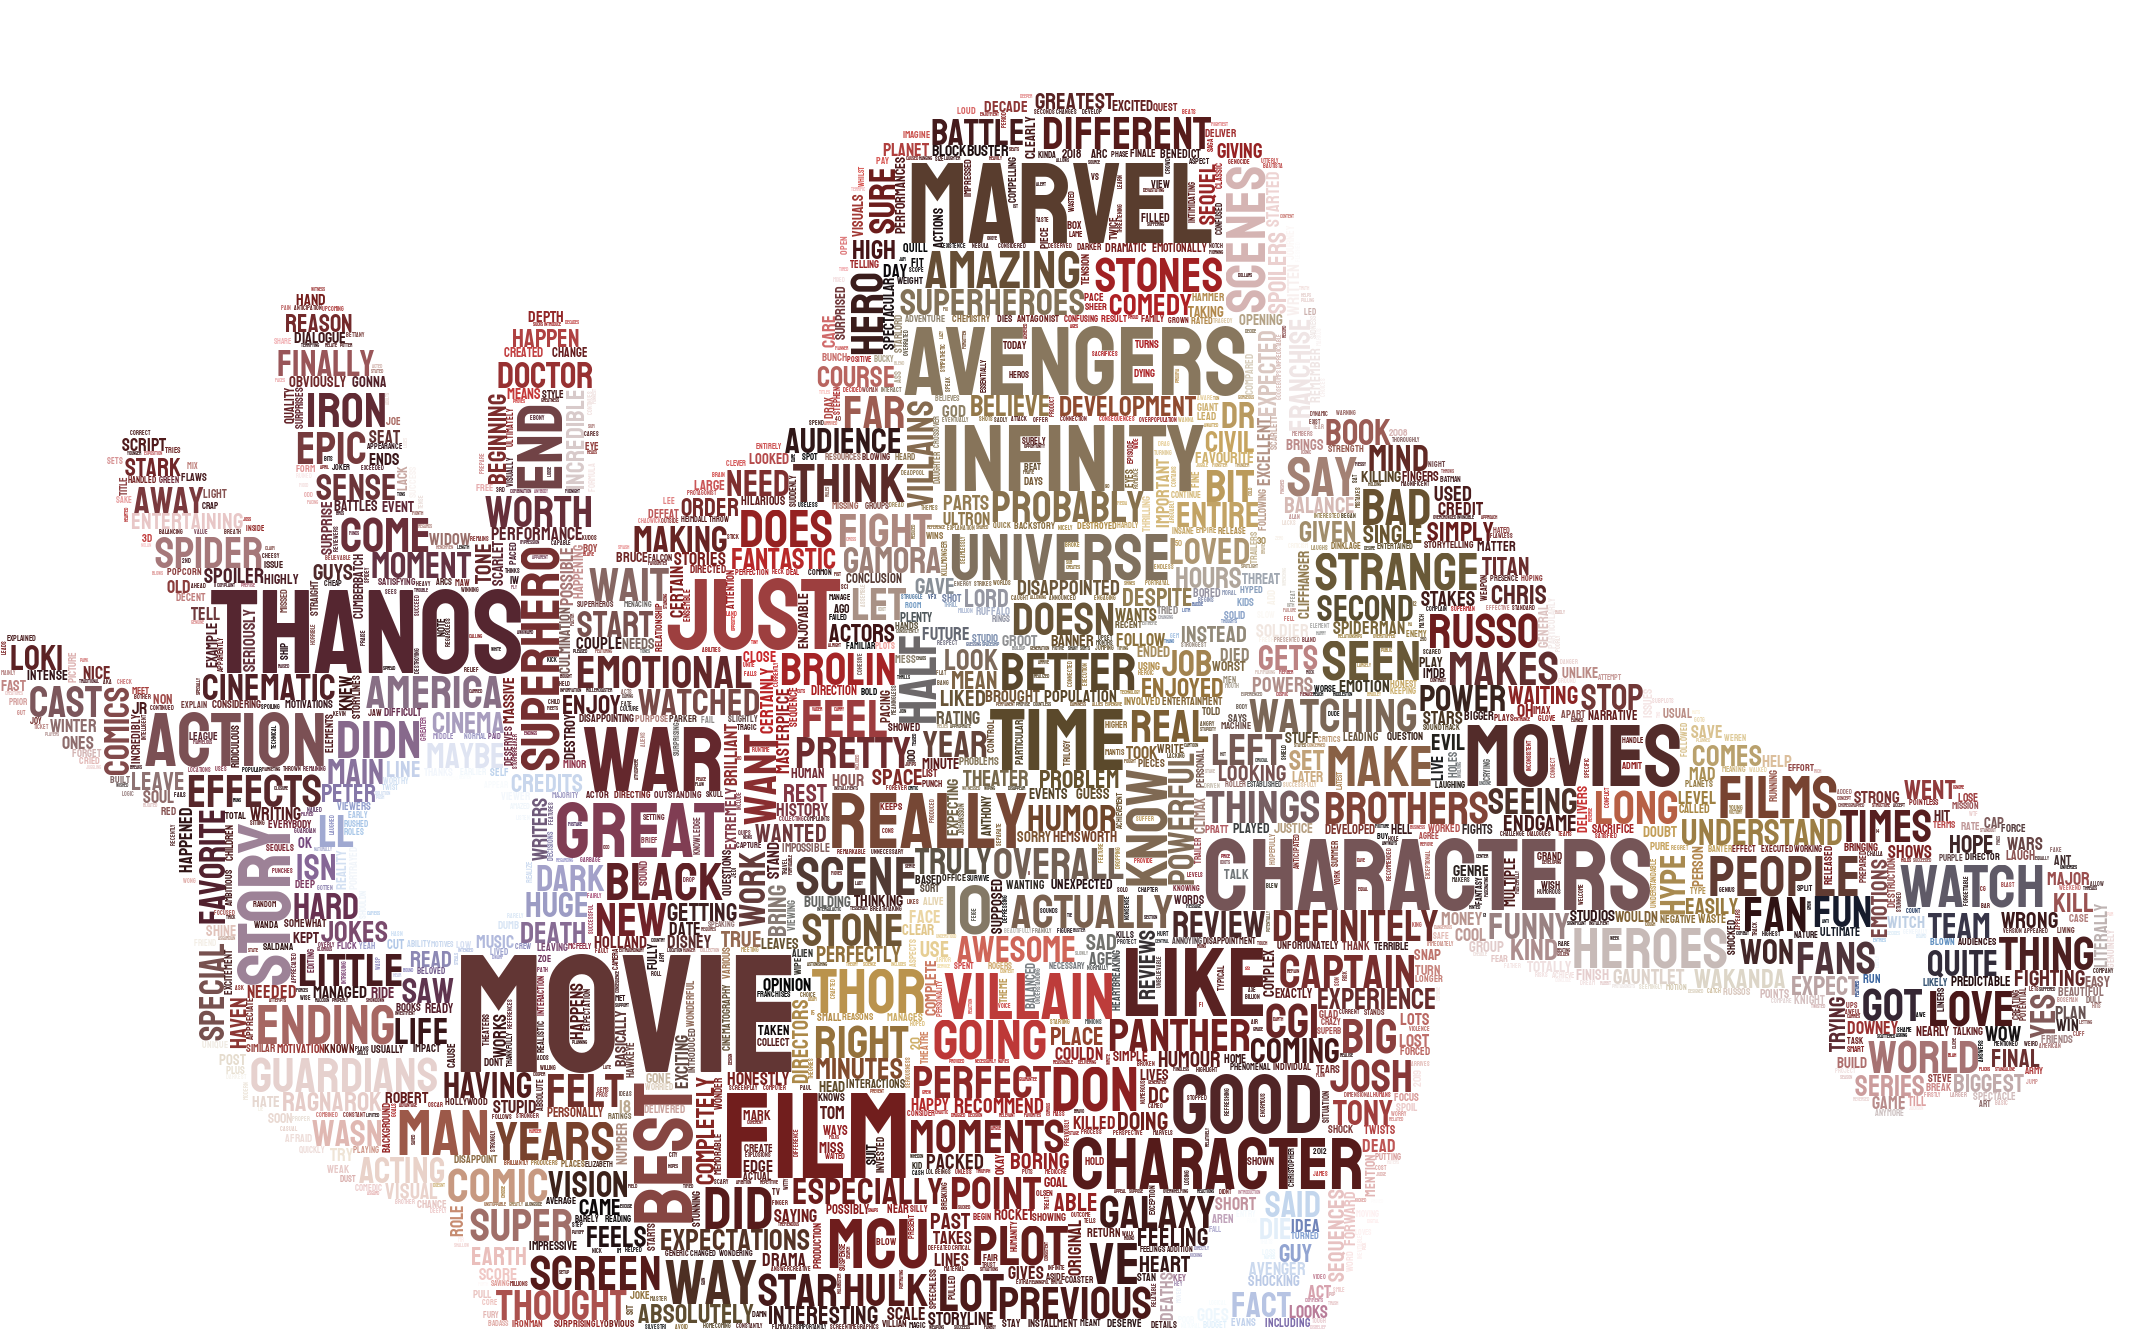

In [4]:
wc = WordCloudGenerator(dir_path="../")
wc.generate_image(path=f"../data/{prefix}_count.json", mask="avengers.jpg", pixels=1500, save=True)

## <a name="multiple">3. Multiple Movies</a> 
[Back to Table of Contents](#table)

The following is a set of functions used to scrape and analyze multiple movies. 
Since reviews of multiple movies are extracted, it is easier to apply a Class-based TF-IDF algorithm (i.e., C-TF-IDF)
that can extract important words for specific movies compared to reviews of all other movies. 
This helps in extracting more informative words. 

In [3]:
prefix = "movies"

#### <a name="multiple-scrape">3.1 Scrape</a> 
Scrape reviews from the review page of multiple IMDB movies and save them to a single json file with a custom prefix in the name. 

In [2]:
sc = Scraper(dir_path="../", prefix=prefix)
urls = ["https://www.imdb.com/title/tt4633694/reviews?ref_=tt_ov_rt"  # Spider-Man: Into the Spider-Verse
        "https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ov_rt", # Avengers: Infinity War
        "https://www.imdb.com/title/tt0910970/reviews?ref_=tt_ov_rt"] # Wall-E
sc.scrape(urls)
sc.parse_data()

#### <a name="multiple-ctfidf">3.2 C-TF-IDF</a> 

The following formula can best be explained as a TF-IDF formula adopted for multiple classes by joining all documents per class. Thus, each class is converted to a single document instead of set of documents. Then, the frequency of words **t** are extracted for each class **i** and divided by the total number of words **w**. 

Next, the total, unjoined, number of documents across all classes **m** is divided by the total sum of word **i** across all classes. 

![title](../images/ctfidf.gif)


In [3]:
tf = TFIDF(dir_path="../")
tf.generate(review_path="../data/movies_reviews.json", save_prefix=prefix, class_tfidf=True)

#### <a name="multiple-cloud">3.3 Cloud</a> 
Generate a word cloud based on the above C-TF-IDF data. Make sure to create a .jpg mask in image/masks/ and put the correct link in the parameter "mask". Moreover, make sure to create a solid white background. Only pure white (i.e., 255) is ignored when used as the background (see examples in image/masks/).

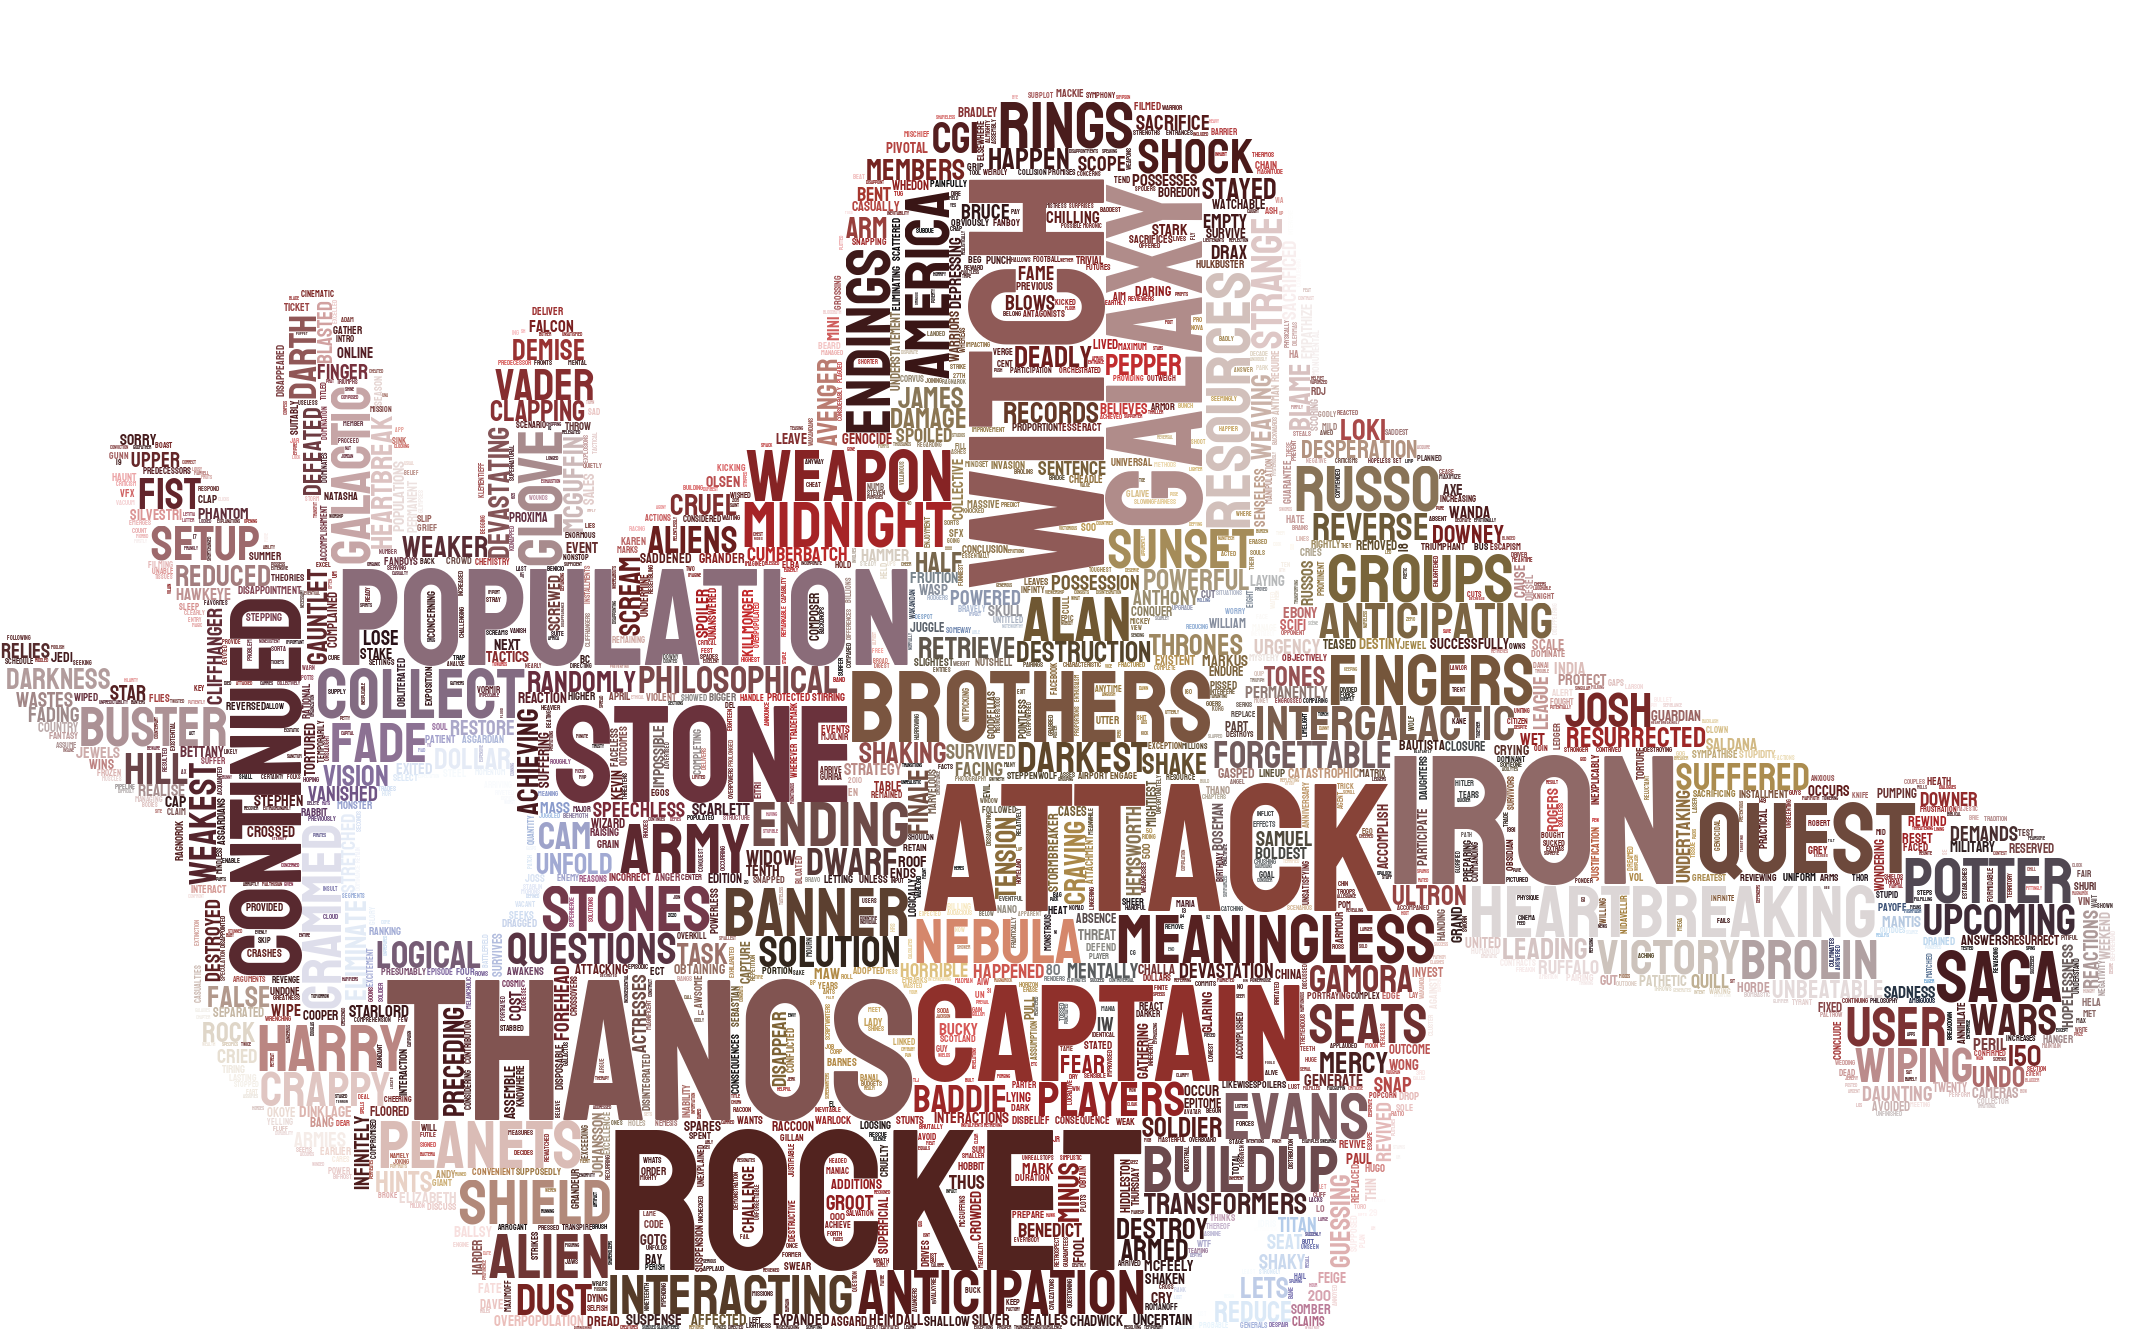

In [5]:
wc = WordCloudGenerator(dir_path="../")
wc.generate_image(path=f"../data/{prefix}_tfidf_relative.json", movie="Avengers: Infinity War", mask="avengers.jpg", pixels=1500, save=True)

## <a name="disney">4. Disney + Pixar Movies</a> 
[Back to Table of Contents](#table)

The following is a set of functions used to scrape and analyze movies from Walt Disney Animation Studios and Pixar. 
Since reviews of multiple movies are extracted, it is easier to apply a Class-based TF-IDF algorithm (i.e., C-TF-IDF)
that can extract important words for specific movies compared to reviews of all other movies. 
This helps in extracting more informative words. 

#### <a name="disney-scrape">4.1 Scrape</a> 

All Disney and Pixar movie reviews are scraped. This should work even if new movies are released. 

In [ ]:
sc = Scraper(dir_path="../", prefix="Disney")
urls = sc.get_disney_urls()
sc.scrape(urls)
sc.parse_data()

#### <a name="disney-ctfidf">4.2 C-TF-IDF</a> 
Apply C-TF-IDF to all movies. 

In [ ]:
tf = TFIDF(dir_path="../")
tf.generate_disney()

#### <a name="disney-cloud">4.3 Cloud</a> 

Create a word cloud for a specific movie based on C-TF-IDF

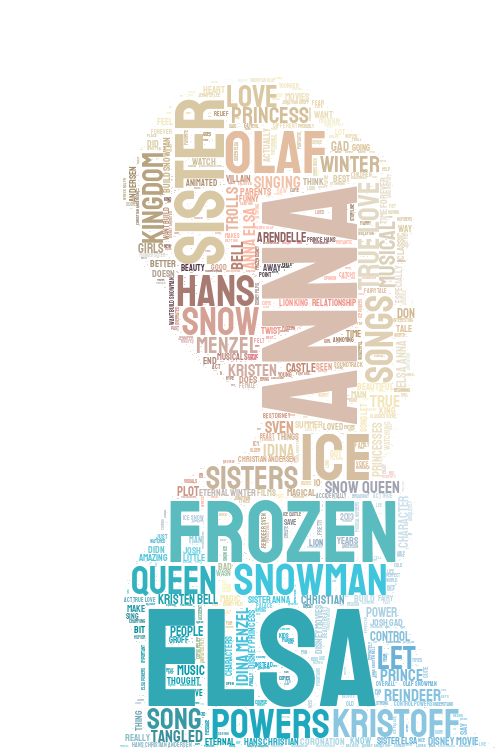

In [2]:
wc = WordCloudGenerator(dir_path="../")
image = wc.generate_image(movie="Frozen", word_type="TF-IDF", mask="frozen.jpg", pixels=500, save=False); image